"Data Preparation and Analysis of Youth Population by State"

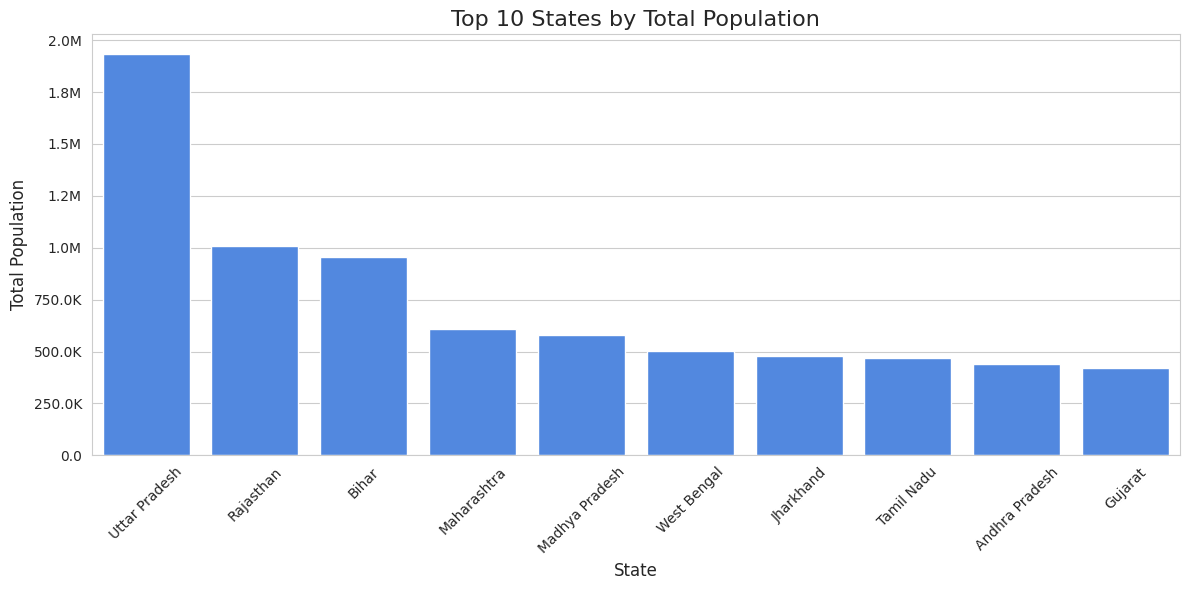

This bar chart shows the top 10 states by total population (sum of age groups 5-17 and 17+). Uttar Pradesh and Rajasthan dominate, reflecting their large populations.


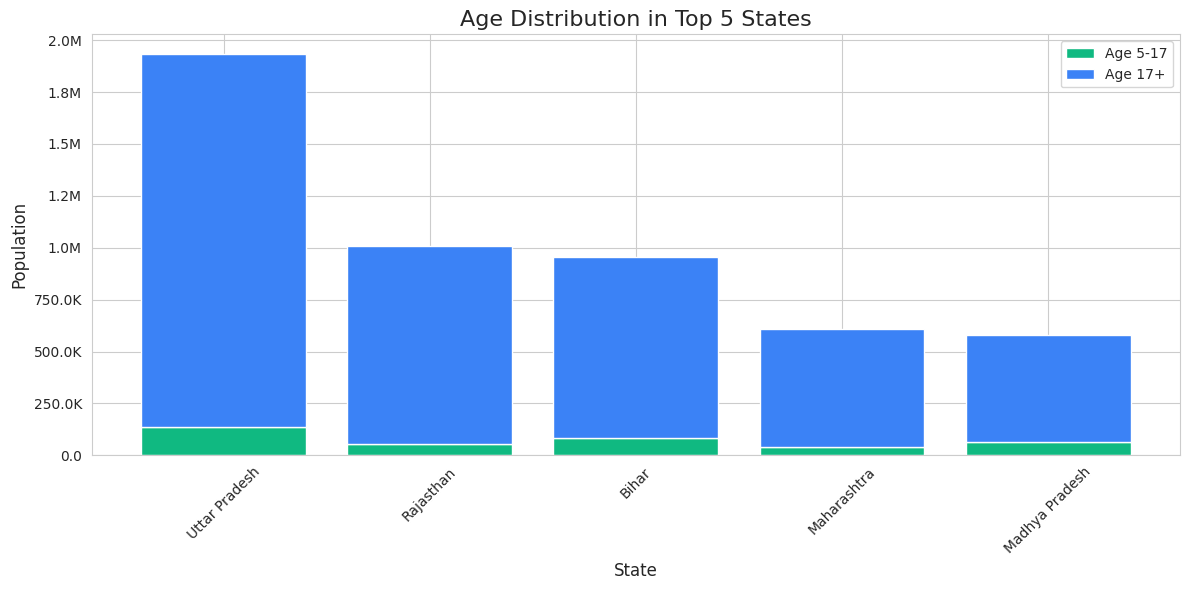

This stacked bar chart compares the population of age groups 5-17 and 17+ in the top 5 states. The adult population (17+) significantly outweighs the youth population.


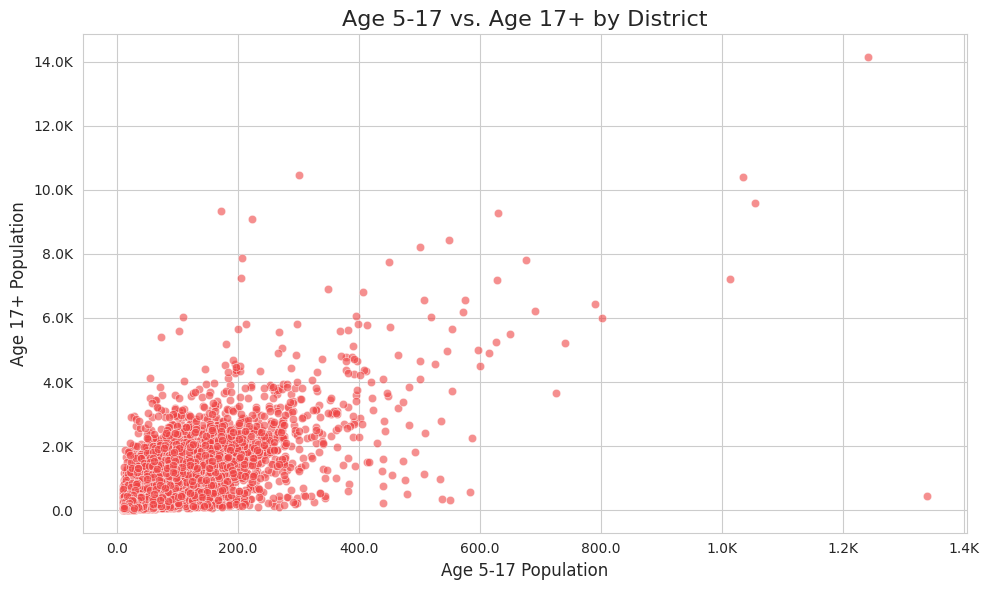

This scatter plot shows the relationship between the 5-17 and 17+ age groups across districts. Most districts have a higher adult population, with some outliers showing larger youth populations.


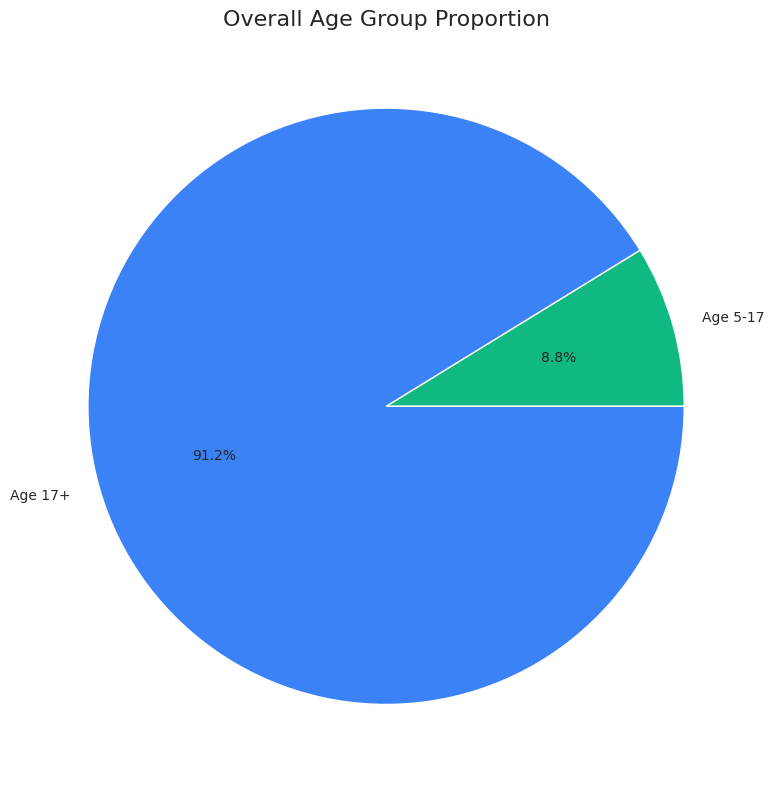

This pie chart illustrates the proportion of the 5-17 age group versus the 17+ age group across the entire dataset. The adult population dominates, comprising a significant majority.
The state of Ladakh has the highest proportion of youth (ages 5-17) at 29.0% of its total population. This suggests a relatively younger demographic, which could indicate higher birth rates or a growing population in this region.


In [ ]:
# Install required libraries
!pip install pandas matplotlib seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load and clean data
data = pd.read_csv('/content/drive/MyDrive/Demographic_update_data_March25.csv')
data.columns = data.columns.str.strip()
data['Demo_age_5_17'] = pd.to_numeric(data['Demo_age_5_17'], errors='coerce').fillna(0)
data['Demo_age_17+'] = pd.to_numeric(data['Demo_age_17+'], errors='coerce').fillna(0)
data['total_population'] = data['Demo_age_5_17'] + data['Demo_age_17+']

# Aggregate data by state
state_data = data.groupby('State').agg({
    'Demo_age_5_17': 'sum',
    'Demo_age_17+': 'sum',
    'total_population': 'sum'
}).reset_index()
state_data['youth_proportion'] = state_data['Demo_age_5_17'] / state_data['total_population']

# Function to format large numbers
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    return str(num)

# Bar Chart: Top 10 States by Total Population
top_states = state_data.sort_values('total_population', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='total_population', data=top_states, color='#3B82F6')
plt.title('Top 10 States by Total Population', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.tight_layout()
plt.show()
print('This bar chart shows the top 10 states by total population (sum of age groups 5-17 and 17+). Uttar Pradesh and Rajasthan dominate, reflecting their large populations.')

# Stacked Bar Chart: Age Distribution in Top 5 States
top_5_states = top_states.head(5)
plt.figure(figsize=(12, 6))
plt.bar(top_5_states['State'], top_5_states['Demo_age_5_17'], label='Age 5-17', color='#10B981')
plt.bar(top_5_states['State'], top_5_states['Demo_age_17+'], bottom=top_5_states['Demo_age_5_17'], label='Age 17+', color='#3B82F6')
plt.title('Age Distribution in Top 5 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.tight_layout()
plt.show()
print('This stacked bar chart compares the population of age groups 5-17 and 17+ in the top 5 states. The adult population (17+) significantly outweighs the youth population.')

# Scatter Plot: Age 5-17 vs. Age 17+
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Demo_age_5_17', y='Demo_age_17+', data=data, color='#EF4444', alpha=0.6)
plt.title('Age 5-17 vs. Age 17+ by District', fontsize=16)
plt.xlabel('Age 5-17 Population', fontsize=12)
plt.ylabel('Age 17+ Population', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.tight_layout()
plt.show()
print('This scatter plot shows the relationship between the 5-17 and 17+ age groups across districts. Most districts have a higher adult population, with some outliers showing larger youth populations.')

# Pie Chart: Overall Age Group Proportion
pie_data = [
    {'name': 'Age 5-17', 'value': data['Demo_age_5_17'].sum()},
    {'name': 'Age 17+', 'value': data['Demo_age_17+'].sum()}
]
pie_df = pd.DataFrame(pie_data)
plt.figure(figsize=(8, 8))
plt.pie(pie_df['value'], labels=pie_df['name'], autopct='%1.1f%%', colors=['#10B981', '#3B82F6'])
plt.title('Overall Age Group Proportion', fontsize=16)
plt.tight_layout()
plt.show()
print('This pie chart illustrates the proportion of the 5-17 age group versus the 17+ age group across the entire dataset. The adult population dominates, comprising a significant majority.')

# Interesting Fact
highest_youth_state = state_data.loc[state_data['youth_proportion'].idxmax()]
print(f"The state of {highest_youth_state['State']} has the highest proportion of youth (ages 5-17) at {highest_youth_state['youth_proportion']*100:.1f}% of its total population. This suggests a relatively younger demographic, which could indicate higher birth rates or a growing population in this region.")

In [ ]:
# Install required libraries
!pip install pandas xgboost

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean data
data = pd.read_csv('/content/Demographic_update_data_March25.csv')
data.columns = data.columns.str.strip()
data['Demo_age_5_17'] = pd.to_numeric(data['Demo_age_5_17'], errors='coerce').fillna(0)
data['Demo_age_17+'] = pd.to_numeric(data['Demo_age_17+'], errors='coerce').fillna(0)

# Encode categorical variable 'State'
le = LabelEncoder()
data['State_encoded'] = le.fit_transform(data['State'])

# Prepare features (X) and target (y)
X = data[['Demo_age_5_17', 'State_encoded']]
y = data['Demo_age_17+']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Function to format large numbers
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    return str(num)

# Print model performance
print(f'Regression Model Performance:')
print(f'Mean Absolute Error (MAE): {format_number(mae)}')
print(f'Mean Squared Error (MSE): {format_number(mse)}')
print(f'R² Score: {r2:.3f}')
print('The XGBoost model predicts the 17+ population based on the 5-17 population and state.')

# Regression Insight
data['predicted_17+'] = model.predict(data[['Demo_age_5_17', 'State_encoded']])
data['prediction_error'] = abs(data['Demo_age_17+'] - data['predicted_17+'])
highest_error_row = data.loc[data['prediction_error'].idxmax()]
print(f"Regression Insight: The largest prediction error occurs in {highest_error_row['State']} (District: {highest_error_row.get('District', 'Unknown')}), with an error of {format_number(highest_error_row['prediction_error'])}.")

Regression Model Performance:
Mean Absolute Error (MAE): 181.2534942626953
Mean Squared Error (MSE): 128.4K
R² Score: 0.756
The XGBoost model predicts the 17+ population based on the 5-17 population and state.
Regression Insight: The largest prediction error occurs in Delhi (District: West Delhi), with an error of 8.6K.


In [ ]:
# Install required libraries
!pip install pandas statsmodels prophet

# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Load and clean data
data = pd.read_csv('/content/Demographic_update_data_March25.csv')
data.columns = data.columns.str.strip()
data['Demo_age_5_17'] = pd.to_numeric(data['Demo_age_5_17'], errors='coerce').fillna(0)
data['Demo_age_17+'] = pd.to_numeric(data['Demo_age_17+'], errors='coerce').fillna(0)

# Aggregate data by State
state_data = data.groupby('State').agg({
    'Demo_age_5_17': 'sum',
    'Demo_age_17+': 'sum'
}).reset_index()

# Function to format large numbers
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    return str(num)

# Create synthetic time-series data for a single state (e.g., first state)
# Assume monthly data from Jan 2024 to Mar 2025 (15 months)
state_example = state_data.iloc[0]  # Select first state for simplicity
state_name = state_example['State']
n_months = 15
dates = [datetime(2024, 1, 1) + relativedelta(months=i) for i in range(n_months)]
ts_data = pd.DataFrame({
    'ds': dates,
    'y': np.linspace(state_example['Demo_age_17+'] * 0.8, state_example['Demo_age_17+'], n_months),  # Simulate trend
    'Demo_age_5_17': np.linspace(state_example['Demo_age_5_17'] * 0.8, state_example['Demo_age_5_17'], n_months)
})

# Split data into train and test (last 3 months for testing)
train_data = ts_data.iloc[:-3]
test_data = ts_data.iloc[-3:].copy() # Added .copy() to avoid SettingWithCopyWarning
y_train = train_data['y']
y_test = test_data['y']
exog_train = train_data[['Demo_age_5_17']]
exog_test = test_data[['Demo_age_5_17']]

# ARIMA Model
arima_model = ARIMA(y_train, exog=exog_train, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_data), exog=exog_test)
arima_mae = mean_absolute_error(y_test, arima_pred)
arima_mse = mean_squared_error(y_test, arima_pred)
arima_r2 = r2_score(y_test, arima_pred)
print('ARIMA Model Performance:')
print(f'Mean Absolute Error (MAE): {format_number(arima_mae)}')
print(f'Mean Squared Error (MSE): {format_number(arima_mse)}')
print(f'R² Score: {arima_r2:.3f}')

# SARIMA Model (assuming yearly seasonality, period=12)
sarima_model = SARIMAX(y_train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(test_data), exog=exog_test)
sarima_mae = mean_absolute_error(y_test, sarima_pred)
sarima_mse = mean_squared_error(y_test, sarima_pred)
sarima_r2 = r2_score(y_test, sarima_pred)
print('\nSARIMA Model Performance:')
print(f'Mean Absolute Error (MAE): {format_number(sarima_mae)}')
print(f'Mean Squared Error (MSE): {format_number(sarima_mse)}')
print(f'R² Score: {sarima_r2:.3f}')

# Prophet Model
prophet_data = train_data[['ds', 'y', 'Demo_age_5_17']].copy()
prophet_data_test = test_data[['ds', 'y', 'Demo_age_5_17']].copy()
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.add_regressor('Demo_age_5_17')
prophet_model.fit(prophet_data)
future = prophet_data_test[['ds', 'Demo_age_5_17']]
prophet_pred = prophet_model.predict(future)
prophet_mae = mean_absolute_error(test_data['y'], prophet_pred['yhat'])
prophet_mse = mean_squared_error(test_data['y'], prophet_pred['yhat'])
prophet_r2 = r2_score(test_data['y'], prophet_pred['yhat'])
print('\nProphet Model Performance:')
print(f'Mean Absolute Error (MAE): {format_number(prophet_mae)}')
print(f'Mean Squared Error (MSE): {format_number(prophet_mse)}')
print(f'R² Score: {prophet_r2:.3f}')

# Regression Insight (using Prophet predictions)
test_data['predicted_17+'] = prophet_pred['yhat'].values # Added .values to avoid index misalignment
test_data['prediction_error'] = abs(test_data['y'] - test_data['predicted_17+'])
# Drop rows with NaN before finding the index of the max prediction error
test_data_cleaned = test_data.dropna(subset=['prediction_error'])
highest_error_idx = test_data_cleaned['prediction_error'].idxmax()

if pd.isna(highest_error_idx):
    print("No prediction error found in the test data.")
else:
    highest_error = test_data_cleaned.loc[highest_error_idx]
    print(f'\nRegression Insight: The largest prediction error in Prophet model occurs for {state_name} at {highest_error["ds"].strftime("%B %Y")}, with an error of {format_number(highest_error["prediction_error"])}.')

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzakyp6s_/mgyc3cyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzakyp6s_/9mub03b4.

ARIMA Model Performance:
Mean Absolute Error (MAE): 1.7810937909719844e-12
Mean Squared Error (MSE): 3.175167247143653e-24
R² Score: 1.000

SARIMA Model Performance:
Mean Absolute Error (MAE): 345.21446471419614
Mean Squared Error (MSE): 119.2K
R² Score: -1092.501


03:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet Model Performance:
Mean Absolute Error (MAE): 7.1K
Mean Squared Error (MSE): 51.4M
R² Score: -471595.420

Regression Insight: The largest prediction error in Prophet model occurs for Andaman and Nicobar Islands at January 2025, with an error of 8.1K.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


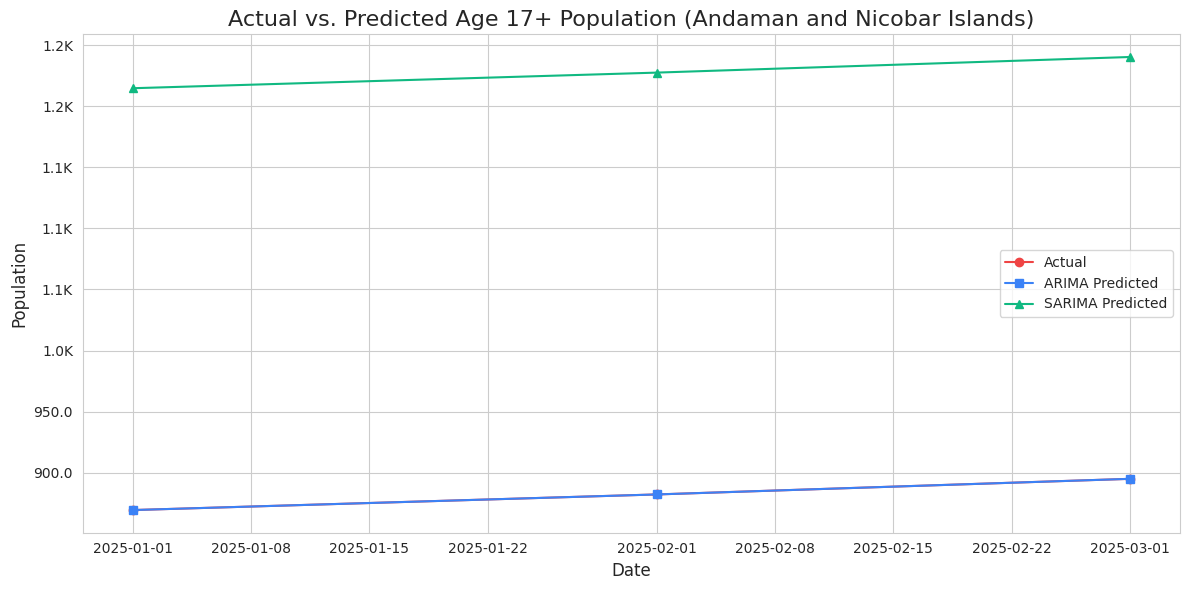

This time-series plot compares actual Age 17+ population with ARIMA and SARIMA predictions over the test period.


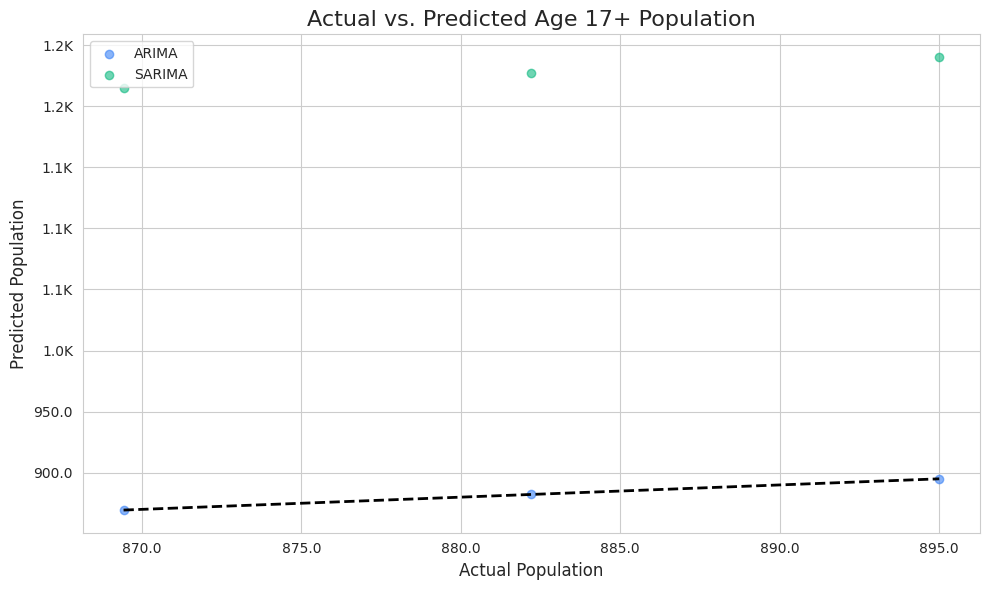

This scatter plot compares actual vs. predicted Age 17+ population for ARIMA and SARIMA. Points closer to the diagonal line indicate better predictions.

ARIMA Model Performance:
Mean Absolute Error (MAE): 1.7810937909719844e-12
Mean Squared Error (MSE): 3.175167247143653e-24
R² Score: 1.000

SARIMA Model Performance:
Mean Absolute Error (MAE): 345.21446471419614
Mean Squared Error (MSE): 119.2K
R² Score: -1092.501


In [ ]:
# Install required libraries
!pip install pandas statsmodels matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load and clean data
data = pd.read_csv('/content/Demographic_update_data_March25.csv')
data.columns = data.columns.str.strip()
data['Demo_age_5_17'] = pd.to_numeric(data['Demo_age_5_17'], errors='coerce').fillna(0)
data['Demo_age_17+'] = pd.to_numeric(data['Demo_age_17+'], errors='coerce').fillna(0)

# Aggregate data by State
state_data = data.groupby('State').agg({
    'Demo_age_5_17': 'sum',
    'Demo_age_17+': 'sum'
}).reset_index()

# Function to format large numbers
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    return str(num)

# Create synthetic time-series data for a single state (first state)
state_example = state_data.iloc[0]
state_name = state_example['State']
n_months = 15
dates = [datetime(2024, 1, 1) + relativedelta(months=i) for i in range(n_months)]
ts_data = pd.DataFrame({
    'ds': dates,
    'y': np.linspace(state_example['Demo_age_17+'] * 0.8, state_example['Demo_age_17+'], n_months),
    'Demo_age_5_17': np.linspace(state_example['Demo_age_5_17'] * 0.8, state_example['Demo_age_5_17'], n_months)
})

# Split data into train and test (last 3 months for testing)
train_data = ts_data.iloc[:-3]
test_data = ts_data.iloc[-3:]
y_train = train_data['y']
y_test = test_data['y']
exog_train = train_data[['Demo_age_5_17']]
exog_test = test_data[['Demo_age_5_17']]

# ARIMA Model
arima_model = ARIMA(y_train, exog=exog_train, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_data), exog=exog_test)
arima_mae = mean_absolute_error(y_test, arima_pred)
arima_mse = mean_squared_error(y_test, arima_pred)
arima_r2 = r2_score(y_test, arima_pred)

# SARIMA Model
sarima_model = SARIMAX(y_train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(test_data), exog=exog_test)
sarima_mae = mean_absolute_error(y_test, sarima_pred)
sarima_mse = mean_squared_error(y_test, sarima_pred)
sarima_r2 = r2_score(y_test, sarima_pred)

# Visualization 1: Time-Series Plot (Actual vs. Predicted)
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_test, label='Actual', color='#EF4444', marker='o')
plt.plot(test_data['ds'], arima_pred, label='ARIMA Predicted', color='#3B82F6', marker='s')
plt.plot(test_data['ds'], sarima_pred, label='SARIMA Predicted', color='#10B981', marker='^')
plt.title(f'Actual vs. Predicted Age 17+ Population ({state_name})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.legend()
plt.tight_layout()
plt.show()
print('This time-series plot compares actual Age 17+ population with ARIMA and SARIMA predictions over the test period.')


# Visualization 2: Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, arima_pred, label='ARIMA', color='#3B82F6', alpha=0.6)
plt.scatter(y_test, sarima_pred, label='SARIMA', color='#10B981', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Age 17+ Population', fontsize=16)
plt.xlabel('Actual Population', fontsize=12)
plt.ylabel('Predicted Population', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.legend()
plt.tight_layout()
plt.show()
print('This scatter plot compares actual vs. predicted Age 17+ population for ARIMA and SARIMA. Points closer to the diagonal line indicate better predictions.')

# Print model performance metrics
print('\nARIMA Model Performance:')
print(f'Mean Absolute Error (MAE): {format_number(arima_mae)}')
print(f'Mean Squared Error (MSE): {format_number(arima_mse)}')
print(f'R² Score: {arima_r2:.3f}')
print('\nSARIMA Model Performance:')
print(f'Mean Absolute Error (MAE): {format_number(sarima_mae)}')
print(f'Mean Squared Error (MSE): {format_number(sarima_mse)}')
print(f'R² Score: {sarima_r2:.3f}')

In [ ]:
# Install required libraries
!pip install pandas scikit-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and clean data
data = pd.read_csv('/content/Demographic_update_data_March25.csv')
data.columns = data.columns.str.strip()
data['Demo_age_5_17'] = pd.to_numeric(data['Demo_age_5_17'], errors='coerce').fillna(0)
data['Demo_age_17+'] = pd.to_numeric(data['Demo_age_17+'], errors='coerce').fillna(0)

# Encode categorical variable 'State'
le = LabelEncoder()
data['State_encoded'] = le.fit_transform(data['State'])

# Prepare features (X) and target (y)
X = data[['Demo_age_5_17', 'State_encoded']]
y = data['Demo_age_17+']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Function to format large numbers
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    return str(num)

# Print model performance
print('Random Forest Regressor Performance:')
print(f'Mean Absolute Error (MAE): {format_number(mae)}')
print(f'Mean Squared Error (MSE): {format_number(mse)}')
print(f'R² Score: {r2:.3f}')
print('The Random Forest model predicts the 17+ population based on the 5-17 population and state.')

# Regression Insight
data['predicted_17+'] = rf_model.predict(data[['Demo_age_5_17', 'State_encoded']])
data['prediction_error'] = abs(data['Demo_age_17+'] - data['predicted_17+'])
highest_error_row = data.loc[data['prediction_error'].idxmax()]
print(f"Regression Insight: The largest prediction error occurs in {highest_error_row['State']} (District: {highest_error_row.get('District', 'Unknown')}), with an error of {format_number(highest_error_row['prediction_error'])}.")

Random Forest Regressor Performance:
Mean Absolute Error (MAE): 218.7411695280776
Mean Squared Error (MSE): 170.5K
R² Score: 0.676
The Random Forest model predicts the 17+ population based on the 5-17 population and state.
Regression Insight: The largest prediction error occurs in Delhi (District: West Delhi), with an error of 8.5K.


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 218.7411695280776
Mean Squared Error (MSE): 170.5K
R² Score: 0.676
The Random Forest model predicts the 17+ population based on the 5-17 population and state.


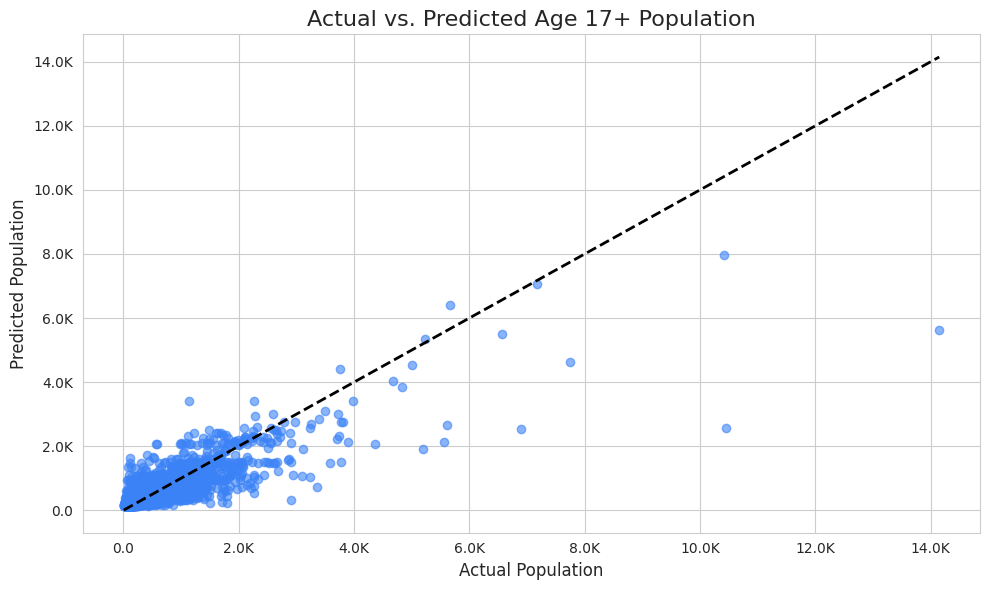

This scatter plot compares actual vs. predicted Age 17+ population. Points closer to the diagonal line indicate better predictions.


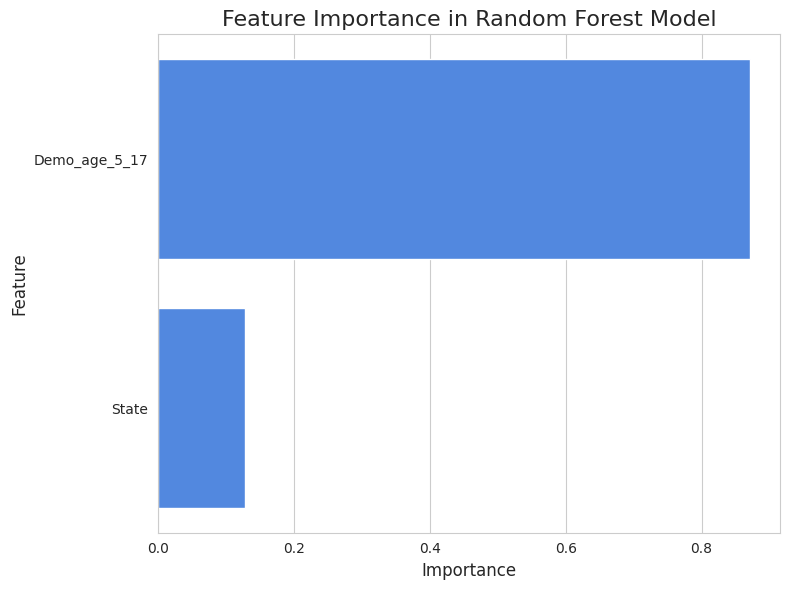

This bar plot shows the importance of each feature in predicting the 17+ population. Higher values indicate greater influence on the model’s predictions.


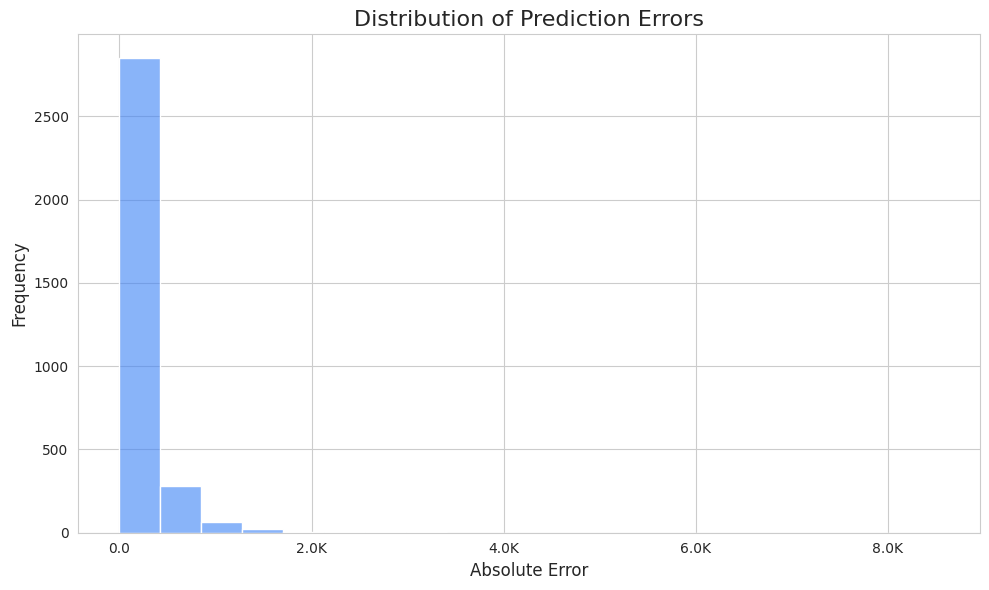

This histogram shows the distribution of absolute prediction errors. A tighter distribution indicates better model accuracy.
Regression Insight: The largest prediction error occurs in Delhi (District: West Delhi), with an error of 8.5K.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load and clean data
data = pd.read_csv('/content/Demographic_update_data_March25.csv')
data.columns = data.columns.str.strip()
data['Demo_age_5_17'] = pd.to_numeric(data['Demo_age_5_17'], errors='coerce').fillna(0)
data['Demo_age_17+'] = pd.to_numeric(data['Demo_age_17+'], errors='coerce').fillna(0)

# Encode categorical variable 'State'
le = LabelEncoder()
data['State_encoded'] = le.fit_transform(data['State'])

# Prepare features (X) and target (y)
X = data[['Demo_age_5_17', 'State_encoded']]
y = data['Demo_age_17+']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Function to format large numbers
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    return str(num)

# Print model performance
print('Random Forest Regressor Performance:')
print(f'Mean Absolute Error (MAE): {format_number(mae)}')
print(f'Mean Squared Error (MSE): {format_number(mse)}')
print(f'R² Score: {r2:.3f}')
print('The Random Forest model predicts the 17+ population based on the 5-17 population and state.')

# Visualization 1: Actual vs. Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#3B82F6', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Age 17+ Population', fontsize=16)
plt.xlabel('Actual Population', fontsize=12)
plt.ylabel('Predicted Population', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.tight_layout()
plt.show()
print('This scatter plot compares actual vs. predicted Age 17+ population. Points closer to the diagonal line indicate better predictions.')

# Visualization 2: Feature Importance Bar Plot
feature_importance = pd.DataFrame({
    'feature': ['Demo_age_5_17', 'State'],
    'importance': rf_model.feature_importances_
})
plt.figure(figsize=(8, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, color='#3B82F6')
plt.title('Feature Importance in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()
print('This bar plot shows the importance of each feature in predicting the 17+ population. Higher values indicate greater influence on the model’s predictions.')

# Visualization 3: Prediction Error Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(np.abs(y_test - y_pred), bins=20, color='#3B82F6', alpha=0.6)
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Absolute Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_number(x)))
plt.tight_layout()
plt.show()
print('This histogram shows the distribution of absolute prediction errors. A tighter distribution indicates better model accuracy.')

# Regression Insight
data['predicted_17+'] = rf_model.predict(data[['Demo_age_5_17', 'State_encoded']])
data['prediction_error'] = abs(data['Demo_age_17+'] - data['predicted_17+'])
highest_error_row = data.loc[data['prediction_error'].idxmax()]
print(f"Regression Insight: The largest prediction error occurs in {highest_error_row['State']} (District: {highest_error_row.get('District', 'Unknown')}), with an error of {format_number(highest_error_row['prediction_error'])}.")